# Imports

In [1]:
from collections import Counter
from typing import List

import pandas as pd

from constants import Env, TargetPath, SourceName
from processors.exploratory_analysis.analysis_constants import Type
from processors.exploratory_analysis.analysis_utils import generate_dataset, process_party, extend_list, process_categories, get_frequency_stats

# Dataframe Generation and Basic Statistics

In [2]:
%%time
dataframe = pd.DataFrame(generate_dataset(f"{Env.ROOT_PREFIX}/{TargetPath.DATA}/{TargetPath.DOCUMENTS}"))
dataframe.head()

CPU times: total: 1min 21s
Wall time: 9min 51s


,url,title,year,source,party,location,categories,file_ref
0,https://www.presidency.ucsb.edu/documents/addr...,Address to the Democratic National Convention ...,2016,American Presidency Project,Democratic,Pennsylvania,"[Campaign Documents, Post Presidential Remarks...",1 American Presidency Project.json
1,https://www.presidency.ucsb.edu/documents/exec...,Executive Order 12082—Armed Forces Promotion a...,1978,American Presidency Project,Democratic,None,"[Written Presidential Orders, Executive Orders...",10 American Presidency Project.json
2,https://www.presidency.ucsb.edu/documents/stat...,Statement by the President on the Agreements f...,1964,American Presidency Project,Democratic,None,"[Presidential, Statements]",100 American Presidency Project.json
3,https://www.presidency.ucsb.edu/documents/rema...,Remarks by the Vice President at the 2003 Geor...,2003,American Presidency Project,None,None,"[Spoken Addresses and Remarks, Vice President'...",1000 American Presidency Project.json
4,https://www.presidency.ucsb.edu/documents/stat...,Statement on Signing the Reciprocal Trade Agre...,1940,American Presidency Project,Democratic,None,"[Presidential, Statements, Signing Statements,...",10000 American Presidency Project.json


In [3]:
dataframe.drop_duplicates(subset=[dataframe.url.name], inplace=True)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98903 entries, 0 to 134274
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         98903 non-null  object
 1   title       98903 non-null  object
 2   year        98903 non-null  int64 
 3   source      98903 non-null  object
 4   party       90915 non-null  object
 5   location    38718 non-null  object
 6   categories  98463 non-null  object
 7   file_ref    98903 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.8+ MB


# Data Processing

## Party

In [5]:
dataframe.dropna(subset=[dataframe.party.name], inplace=True)
dataframe.head(10)

,url,title,year,source,party,location,categories,file_ref
0,https://www.presidency.ucsb.edu/documents/addr...,Address to the Democratic National Convention ...,2016,American Presidency Project,Democratic,Pennsylvania,"[Campaign Documents, Post Presidential Remarks...",1 American Presidency Project.json
1,https://www.presidency.ucsb.edu/documents/exec...,Executive Order 12082—Armed Forces Promotion a...,1978,American Presidency Project,Democratic,None,"[Written Presidential Orders, Executive Orders...",10 American Presidency Project.json
2,https://www.presidency.ucsb.edu/documents/stat...,Statement by the President on the Agreements f...,1964,American Presidency Project,Democratic,None,"[Presidential, Statements]",100 American Presidency Project.json
4,https://www.presidency.ucsb.edu/documents/stat...,Statement on Signing the Reciprocal Trade Agre...,1940,American Presidency Project,Democratic,None,"[Presidential, Statements, Signing Statements,...",10000 American Presidency Project.json
6,https://www.presidency.ucsb.edu/documents/mess...,Message to the Congress on Continuation of the...,2016,American Presidency Project,Democratic,None,"[Messages, Written Messages, Presidential, to ...",100001 American Presidency Project.json
7,https://www.presidency.ucsb.edu/documents/stat...,Statement on the Japan-United States Trade Neg...,1990,American Presidency Project,Republican,None,"[Presidential, Statements, Statements]",100002 American Presidency Project.json
8,https://www.presidency.ucsb.edu/documents/proc...,Proclamation 4665—Extension of Temporary Quant...,1979,American Presidency Project,Democratic,None,"[Written Presidential Orders, Proclamations, P...",100003 American Presidency Project.json
9,https://www.presidency.ucsb.edu/documents/pres...,Press Briefing by Mike McCurry,1997,American Presidency Project,Democratic,None,"[Press/Media, Press Briefings]",100004 American Presidency Project.json
10,https://www.presidency.ucsb.edu/documents/mess...,Message on Army Day.,1932,American Presidency Project,Republican,None,"[Messages, Written Messages, Presidential]",100005 American Presidency Project.json
11,https://www.presidency.ucsb.edu/documents/memo...,Memorandum on Assistance to the Independent St...,1994,American Presidency Project,Democratic,None,"[Presidential, Written Presidential Orders, Me...",100006 American Presidency Project.json


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90915 entries, 0 to 134274
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         90915 non-null  object
 1   title       90915 non-null  object
 2   year        90915 non-null  int64 
 3   source      90915 non-null  object
 4   party       90915 non-null  object
 5   location    34404 non-null  object
 6   categories  90476 non-null  object
 7   file_ref    90915 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [7]:
get_frequency_stats(dataframe.party)

,Absolute,Normalized
Democratic,47249,0.519705
Republican,41463,0.456063
Democratic-Republican,766,0.008425
Whig,457,0.005027
Federalist,304,0.003344
Conservative,165,0.001815
Labour,149,0.001639
Liberal,70,0.000770
Liberal Democrat,65,0.000715
Democratic Farmer Labor,50,0.000550


In [8]:
len(dataframe.party.value_counts())

49

In [9]:
dataframe.party = dataframe.party.apply(process_party)
dataframe.dropna(subset=[dataframe.party.name], inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89871 entries, 0 to 134274
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         89871 non-null  object
 1   title       89871 non-null  object
 2   year        89871 non-null  int64 
 3   source      89871 non-null  object
 4   party       89871 non-null  object
 5   location    34160 non-null  object
 6   categories  89581 non-null  object
 7   file_ref    89871 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [10]:
get_frequency_stats(dataframe.party)

,Absolute,Normalized
Liberal,47478,0.528291
Conservative,42393,0.471709


## Categories

In [11]:
categories_lst: List[str] = []
dataframe.loc[dataframe.categories.notna()].categories.apply(extend_list, args=(categories_lst,))
categories_counter: Counter = Counter(categories_lst)
categories_counter

Counter({'Campaign Documents': 3417,
         'Post Presidential Remarks': 10,
         'Convention Speeches': 41,
         'Written Presidential Orders': 16089,
         'Executive Orders': 12655,
         'Presidential': 77314,
         'Statements': 13655,
         'Signing Statements': 2143,
         'Bill Signing': 2874,
         'Messages': 10428,
         'Written Messages': 11043,
         'to Congress': 11187,
         'Proclamations': 8645,
         'Press/Media': 7048,
         'Press Briefings': 3590,
         'Memoranda': 3120,
         'Determinations': 2223,
         'Miscellaneous Remarks': 15396,
         'Proclamation': 726,
         'Spoken Addresses and Remarks': 13159,
         'Foreign Actors or Audiences': 1127,
         'Exchange with Reporters': 3530,
         'Informal': 2454,
         'Letters': 4609,
         'Citations and Awards': 775,
         'Budget': 73,
         'Vetoes': 888,
         'Pocket Veto': 264,
         'Veto': 893,
         'Elections and 

In [12]:
categories_counter.most_common(10)

[('Presidential', 77314),
 ('Written Presidential Orders', 16089),
 ('Miscellaneous Remarks', 15396),
 ('Statements', 13655),
 ('Spoken Addresses and Remarks', 13159),
 ('Executive Orders', 12655),
 ('to Congress', 11187),
 ('Written Messages', 11043),
 ('Messages', 10428),
 ('Proclamations', 8645)]

In [13]:
len(categories_counter.keys())

138

In [14]:
dataframe["type"] = pd.Series(dtype=object)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89871 entries, 0 to 134274
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         89871 non-null  object
 1   title       89871 non-null  object
 2   year        89871 non-null  int64 
 3   source      89871 non-null  object
 4   party       89871 non-null  object
 5   location    34160 non-null  object
 6   categories  89581 non-null  object
 7   file_ref    89871 non-null  object
 8   type        0 non-null      object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


In [15]:
dataframe.type = dataframe.categories.apply(process_categories)

In [16]:
dataframe.loc[dataframe.categories.isna()].source.value_counts()

British Political Speech           239
Conservative Party Manifestos       26
Liberal, SDP, Libdem Manifestos     25
Name: source, dtype: int64

In [17]:
dataframe.loc[dataframe.source == SourceName.LIBERAL_MANIFESTOS, dataframe.type.name] = Type.WRITTEN
dataframe.loc[dataframe.source == SourceName.CONSERVATIVE_MANIFESTOS, dataframe.type.name] = Type.WRITTEN
dataframe.loc[dataframe.source == SourceName.BRITISH_POLITICAL_SPEECH, dataframe.type.name] = Type.SPOKEN

In [18]:
get_frequency_stats(dataframe.type)

,Absolute,Normalized
Written,50260,0.559246
Spoken,29066,0.323419
Ambiguous,10545,0.117335


## Year

In [19]:
dataframe.year.min()

1789

In [20]:
dataframe.year.max()

2022

In [21]:
dataframe.year.describe()

count    89871.000000
mean      1979.930389
std         38.898645
min       1789.000000
25%       1965.000000
50%       1992.000000
75%       2007.000000
max       2022.000000
Name: year, dtype: float64

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

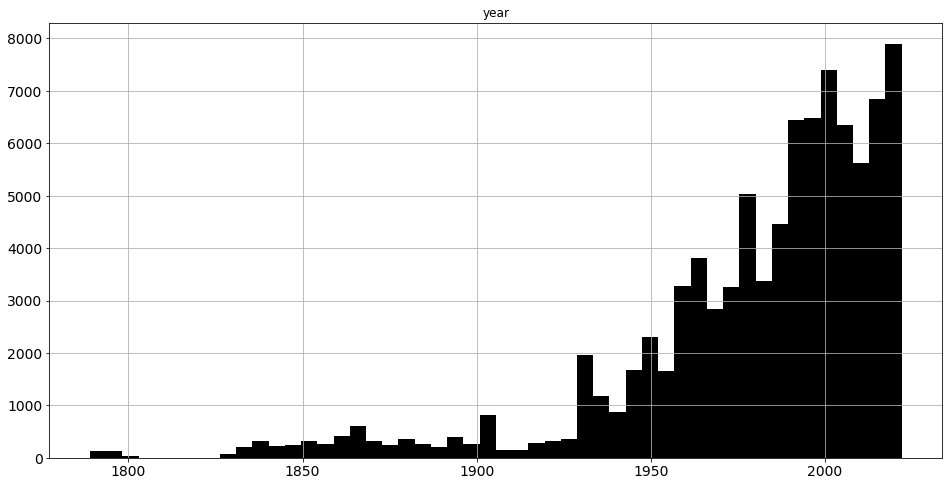

In [22]:
dataframe.hist(column=dataframe.year.name, bins=50, figsize=(16, 8), xlabelsize=14, ylabelsize=14, color="black")

## Location

In [23]:
dataframe.location.value_counts()  # TODO: create a map

Washington, DC                                                     18459
California                                                          1027
New York                                                            1015
Texas                                                                727
Virginia                                                             651
                                                                   ...  
St. Olaf College, Northfield, Minnesota                                1
Bloom Island, Minnesota                                                1
Sheboygan, Wisconsin                                                   1
UCLA Center for Health Policy Research, Los Angeles, California        1
Moldova                                                                1
Name: location, Length: 695, dtype: int64

# Save the Result

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89871 entries, 0 to 134274
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         89871 non-null  object
 1   title       89871 non-null  object
 2   year        89871 non-null  int64 
 3   source      89871 non-null  object
 4   party       89871 non-null  object
 5   location    34160 non-null  object
 6   categories  89581 non-null  object
 7   file_ref    89871 non-null  object
 8   type        89871 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


In [25]:
dataframe.to_csv(f"{Env.ROOT_PREFIX}/{TargetPath.DATA}/meta_exploratory.csv", index=False)